# Aim: Predicting whether the teacher will preplan lectures or not. 

## Teachers add classwork content(stories, videos, pdf, ppt, doc, etc.) for the live lectures for better engagement.  


### Dataframe: Teacher_ID, Gender, Total_Lectures_Conducted_until_now , Library_content_per_day, Education/Qualification, Assignments_Daily, Weekly_Tests, School_Groups, Avg_duration_lec_min and Classwork_Added. 

In [240]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [241]:
df=pd.read_csv("C:/Users/Apoorva/OneDrive/Documents/ML_Practice/DataSets-Practice ML/Toppr _analysis/Teachers_CW.csv")

In [242]:
df.head()

,ID,Gender,Lectures_Conducted,Library_content_pday,Education,Subjects,Assignments_Daily,Weekly_Tests,School_Groups,Avg_duration_lec_min,CW_added
0,12496,Female,40000,1,Bachelors,Commerce,Yes,0,Group A,42,No
1,24107,Male,30000,3,Partial College,Humanities,Yes,1,Group A,43,No
2,14177,Male,80000,5,Partial College,PCM/B,No,2,Group A,60,No
3,24381,Male,70000,0,Bachelors,PCM/B,Yes,1,Group B,41,Yes
4,25597,Male,30000,0,Bachelors,Humanities,No,0,Group A,36,Yes


In [156]:
df.shape

(1000, 11)

In [157]:
df.columns

Index(['ID', 'Gender', 'Lectures_Conducted', 'Library_content_pday',
       'Education', 'Subjects', 'Assignments_Daily', 'Weekly_Tests',
       'School_Groups', 'Avg_duration_lec_min', 'CW_added'],
      dtype='object')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    1000 non-null   int64 
 1   Gender                1000 non-null   object
 2   Lectures_Conducted    1000 non-null   int64 
 3   Library_content_pday  1000 non-null   int64 
 4   Education             1000 non-null   object
 5   Subjects              1000 non-null   object
 6   Assignments_Daily     1000 non-null   object
 7   Weekly_Tests          1000 non-null   int64 
 8   School_Groups         1000 non-null   object
 9   Avg_duration_lec_min  1000 non-null   int64 
 10  CW_added              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


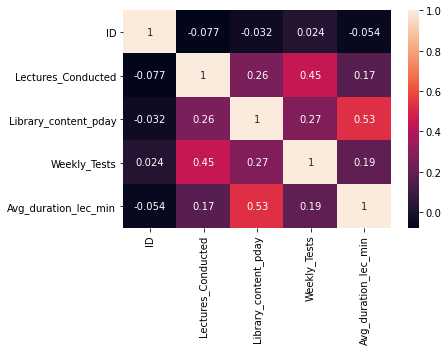

In [159]:
sns.heatmap( df.corr(), annot=True)
plt.show()

### Library Content added per day by teacher weekly tests conducted by teacher seems to be most related to our target of classwork added.

##### Plotting Histogram for each feature to understand distribution

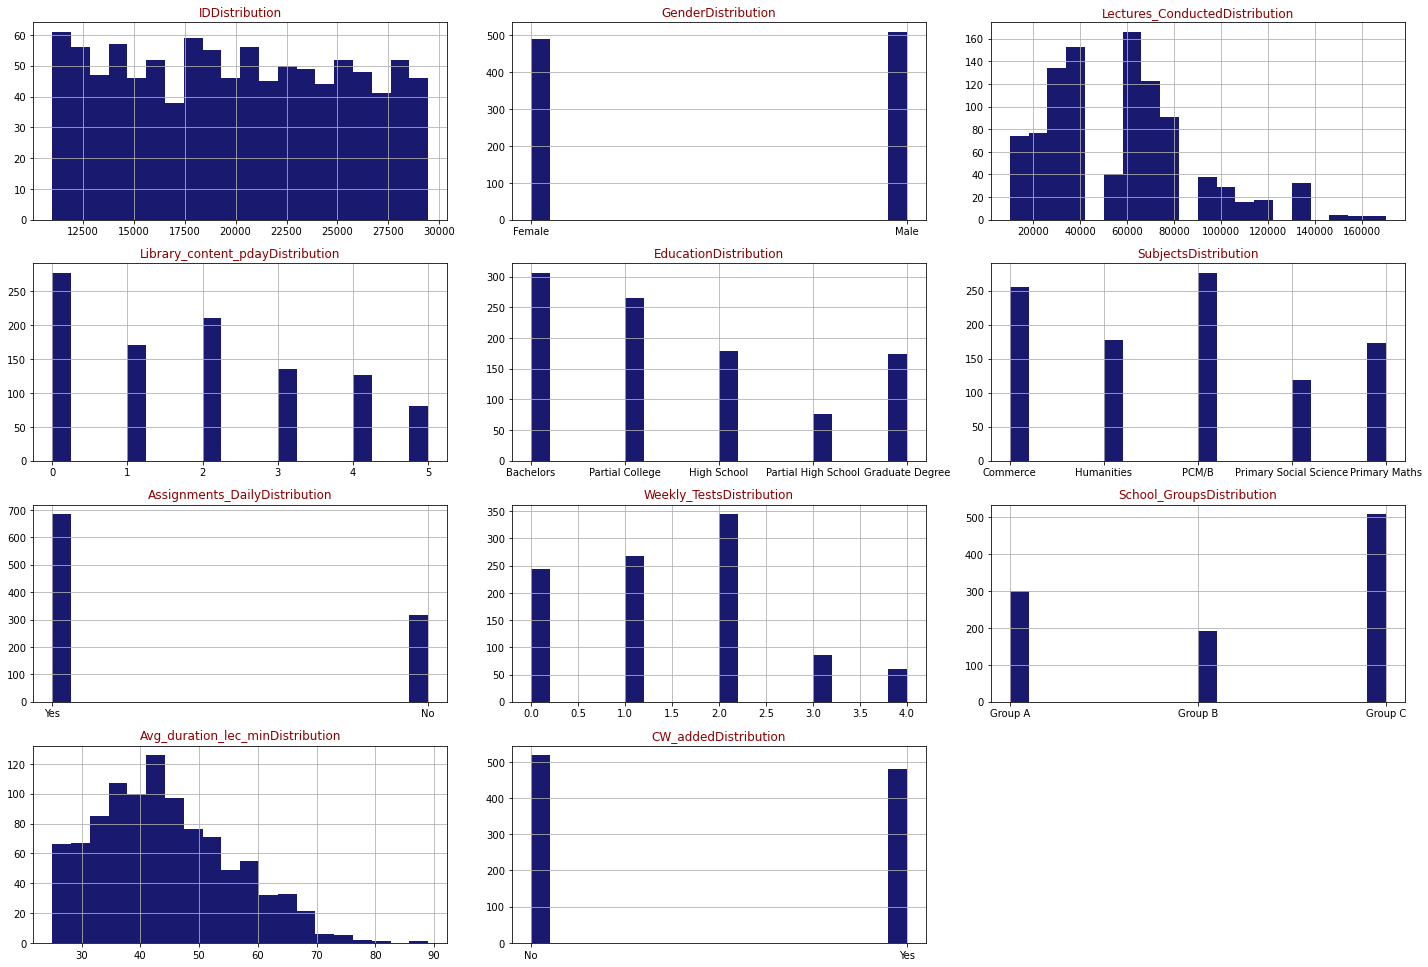

In [160]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+ "Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

#### Looks like lot of categorical columns are there so lets plot numerical columns only for now. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000217FC81C700>,
      dtype=object)

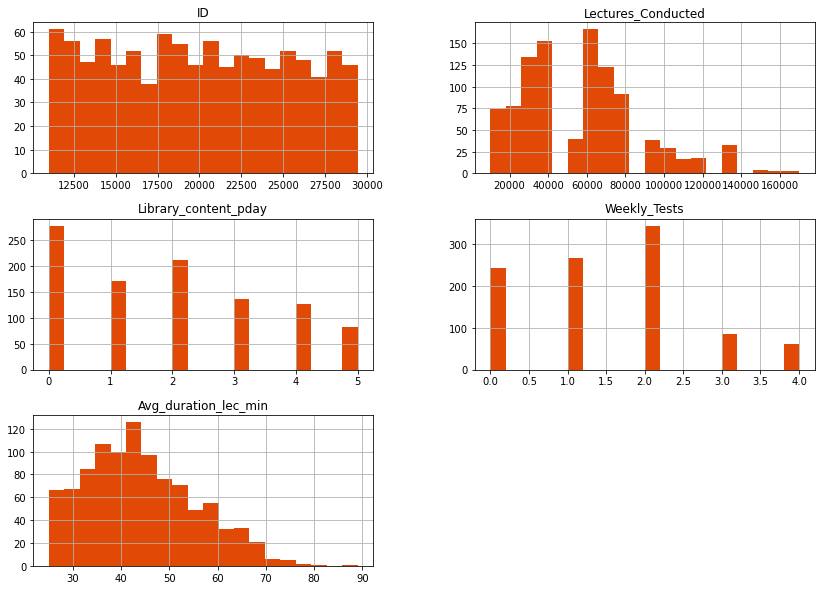

In [161]:
df.hist(bins=20, figsize=(14,10), color='#E14906')


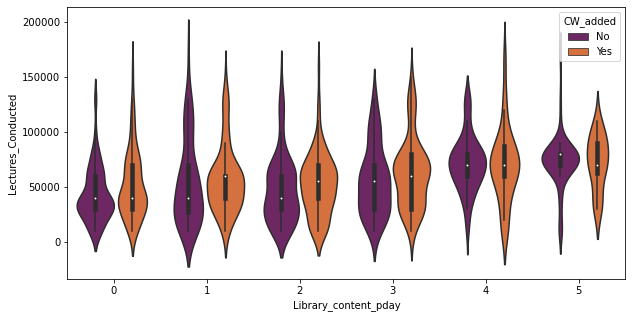

In [164]:
fig=plt.figure(figsize=(10,5))
ax = sns.violinplot(x = 'Library_content_pday', y = 'Lectures_Conducted', data=df,
orient='v', hue='CW_added', palette='inferno')

#### Adding library content is linearly increasing with total lectures conducted until now. 

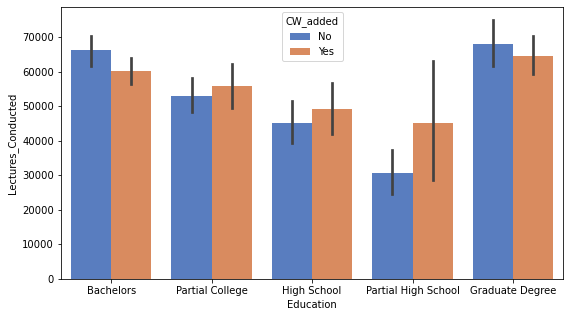

In [167]:
fig, axes = plt.subplots(1, 1, figsize=(9, 5))
sns.barplot(x="Education", y="Lectures_Conducted", hue="CW_added", data=df, palette="muted")


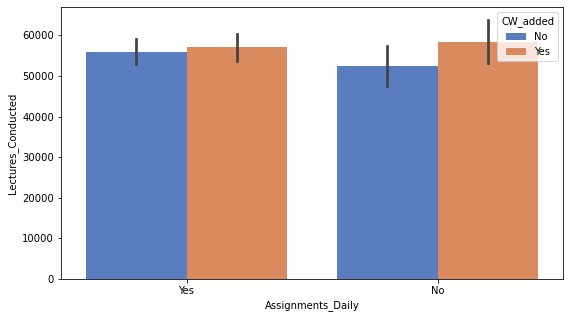

In [168]:
fig, axes = plt.subplots(1, 1, figsize=(9, 5))
sns.barplot(x="Assignments_Daily", y="Lectures_Conducted", hue="CW_added", data=df, palette="muted")


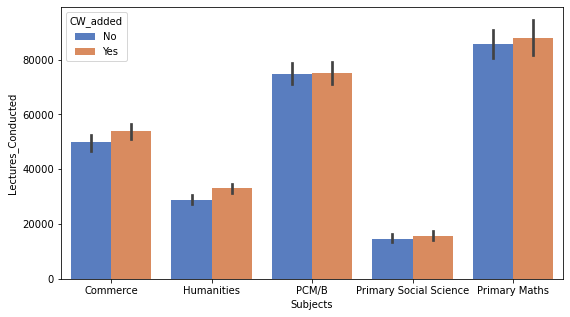

In [170]:
fig, axes = plt.subplots(1, 1, figsize=(9, 5))
sns.barplot(x="Subjects", y="Lectures_Conducted", hue="CW_added", data=df, palette="muted")


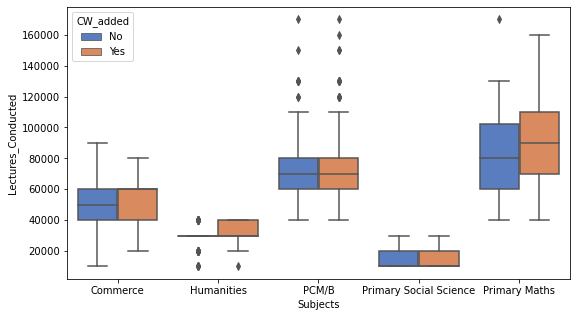

In [171]:
fig, axes = plt.subplots(1, 1, figsize=(9, 5))
sns.boxplot(x="Subjects", y="Lectures_Conducted", hue="CW_added", data=df, palette="muted")



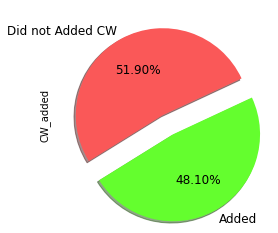

In [173]:
colors = ["#FA5858", "#64FE2E"]
labels ="Did not Added CW", "Added"
df["CW_added"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,  labels=labels, fontsize=12, startangle=25)


In [243]:
df.columns

Index(['ID', 'Gender', 'Lectures_Conducted', 'Library_content_pday',
       'Education', 'Subjects', 'Assignments_Daily', 'Weekly_Tests',
       'School_Groups', 'Avg_duration_lec_min', 'CW_added'],
      dtype='object')

#### Converting Categorical into numerical data. 

In [244]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

df['Gender'] = label_encoder.fit_transform(df['Gender'].astype(str)) 
df['Education'] = label_encoder.fit_transform(df['Education'].astype(str)) 
df['Subjects'] = label_encoder.fit_transform(df['Subjects'].astype(str)) 
df['Assignments_Daily'] = label_encoder.fit_transform(df['Assignments_Daily'].astype(str)) 
df['School_Groups'] = label_encoder.fit_transform(df['School_Groups'].astype(str)) 
df['CW_added'] = label_encoder.fit_transform(df['CW_added'].astype(str)) 
df.head()

,ID,Gender,Lectures_Conducted,Library_content_pday,Education,Subjects,Assignments_Daily,Weekly_Tests,School_Groups,Avg_duration_lec_min,CW_added
0,12496,0,40000,1,0,0,1,0,0,42,0
1,24107,1,30000,3,3,1,1,1,0,43,0
2,14177,1,80000,5,3,2,0,2,0,60,0
3,24381,1,70000,0,0,2,1,1,1,41,1
4,25597,1,30000,0,0,1,0,0,0,36,1


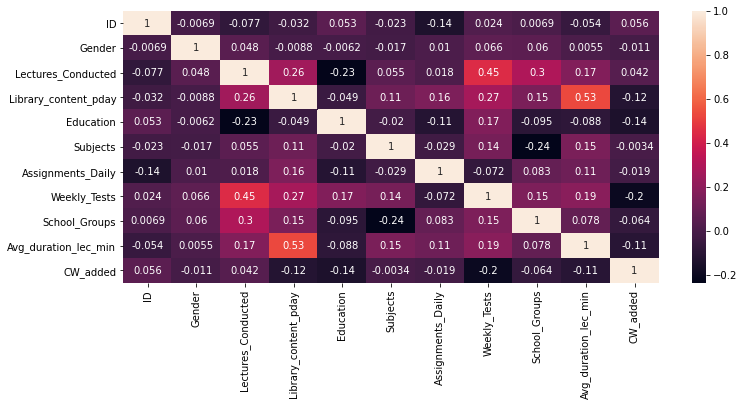

In [245]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5))

sns.heatmap( df.corr(), annot=True)

plt.show()

#### Library Content added by teacher on the platform, Lectures conducted until now, weekly tests, Average duration of lecture are related to our target.  

In [246]:
df['Avg_duration_lec_min'].describe()


count    1000.000000
mean       44.190000
std        11.353537
min        25.000000
25%        35.000000
50%        43.000000
75%        52.000000
max        89.000000
Name: Avg_duration_lec_min, dtype: float64

In [247]:
df['Avg_duration_lec_min'] = pd.cut(x = df['Avg_duration_lec_min'], bins = [0,30,40,50,60,100,150], labels = [0, 1, 2, 3, 4, 5])
df['Avg_duration_lec_min'] = df['Avg_duration_lec_min'].astype('int64') 

In [248]:
df['Avg_duration_lec_min'].isnull().sum()

0

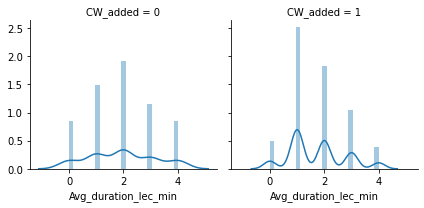

In [249]:
g= sns.FacetGrid(df,col="CW_added")
g.map(sns.distplot,"Avg_duration_lec_min",bins=25)
plt.show()

#### Teachers who added classwork are majority of the lecture duration 25 to 40 minutes. 

In [250]:
df['Lectures_Conducted'].describe()

count      1000.000000
mean      56140.000000
std       31081.609779
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Lectures_Conducted, dtype: float64

In [251]:
df['Lectures_Conducted'] = pd.cut(x = df['Lectures_Conducted'], bins = [0, 30000, 50000, 75000, 100000, 150000, 200000], labels = [1, 2, 3, 4, 5, 6])
df['Lectures_Conducted'] = df['Lectures_Conducted'].astype('int64') 


In [252]:
df['Lectures_Conducted'].isnull().sum()

0

In [253]:
df.dtypes

ID                      int64
Gender                  int32
Lectures_Conducted      int64
Library_content_pday    int64
Education               int32
Subjects                int32
Assignments_Daily       int32
Weekly_Tests            int64
School_Groups           int32
Avg_duration_lec_min    int64
CW_added                int32
dtype: object

In [254]:
X = df.drop(['CW_added'], axis=1)
y = df['CW_added']

### Modeling the data 

In [255]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999)
X_train.shape, X_test.shape


((700, 10), (300, 10))

In [256]:
X_train.head()

,ID,Gender,Lectures_Conducted,Library_content_pday,Education,Subjects,Assignments_Daily,Weekly_Tests,School_Groups,Avg_duration_lec_min
763,12882,1,2,1,1,0,1,0,2,1
534,24637,1,2,4,2,2,1,2,2,4
86,17191,1,5,3,3,2,0,3,0,3
927,11823,0,3,0,1,2,1,0,2,1
134,21094,0,1,2,3,1,1,2,0,2


In [257]:
X_test.head()


,ID,Gender,Lectures_Conducted,Library_content_pday,Education,Subjects,Assignments_Daily,Weekly_Tests,School_Groups,Avg_duration_lec_min
842,15555,0,3,1,3,0,1,1,2,2
68,14813,0,1,4,2,4,1,1,0,2
308,28758,1,2,2,3,1,1,1,0,1
881,11275,0,4,4,1,3,1,2,2,4
350,27878,1,1,0,3,4,0,0,1,0


### Decision Tree Classifier

In [282]:
# sc=StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_test=sc.fit_transform(X_test)

In [258]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=999)

model = model.fit(X_train,y_train)

Predict = model.predict(X_test)
Predict_train = model.predict(X_train)


In [259]:
Predict[:10]


array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [260]:
Predict_train[:10]

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0])

In [261]:
len(Predict)

300

In [262]:
from sklearn.metrics import accuracy_score


print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, Predict)))

Model accuracy score: 0.6133


In [263]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, Predict_train)))

Training-set accuracy score: 0.6471


In [264]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, Predict)
print('Confusion matrix\n', cm)

Confusion matrix
 [[ 82  63]
 [ 53 102]]


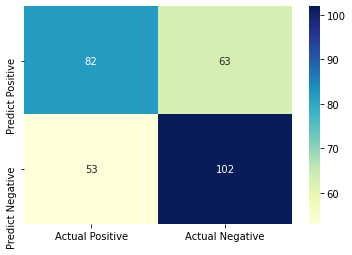

In [265]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [266]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Predict))

              precision    recall  f1-score   support

           0       0.61      0.57      0.59       145
           1       0.62      0.66      0.64       155

    accuracy                           0.61       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.61      0.61      0.61       300



### Accuracy, Precision, F1-Score are around 60%. We need to improve accuracy. We will use GridSearchCV to fit best paramters. 

##### Plotting Tree to see nodes

In [267]:
df.columns

Index(['ID', 'Gender', 'Lectures_Conducted', 'Library_content_pday',
       'Education', 'Subjects', 'Assignments_Daily', 'Weekly_Tests',
       'School_Groups', 'Avg_duration_lec_min', 'CW_added'],
      dtype='object')

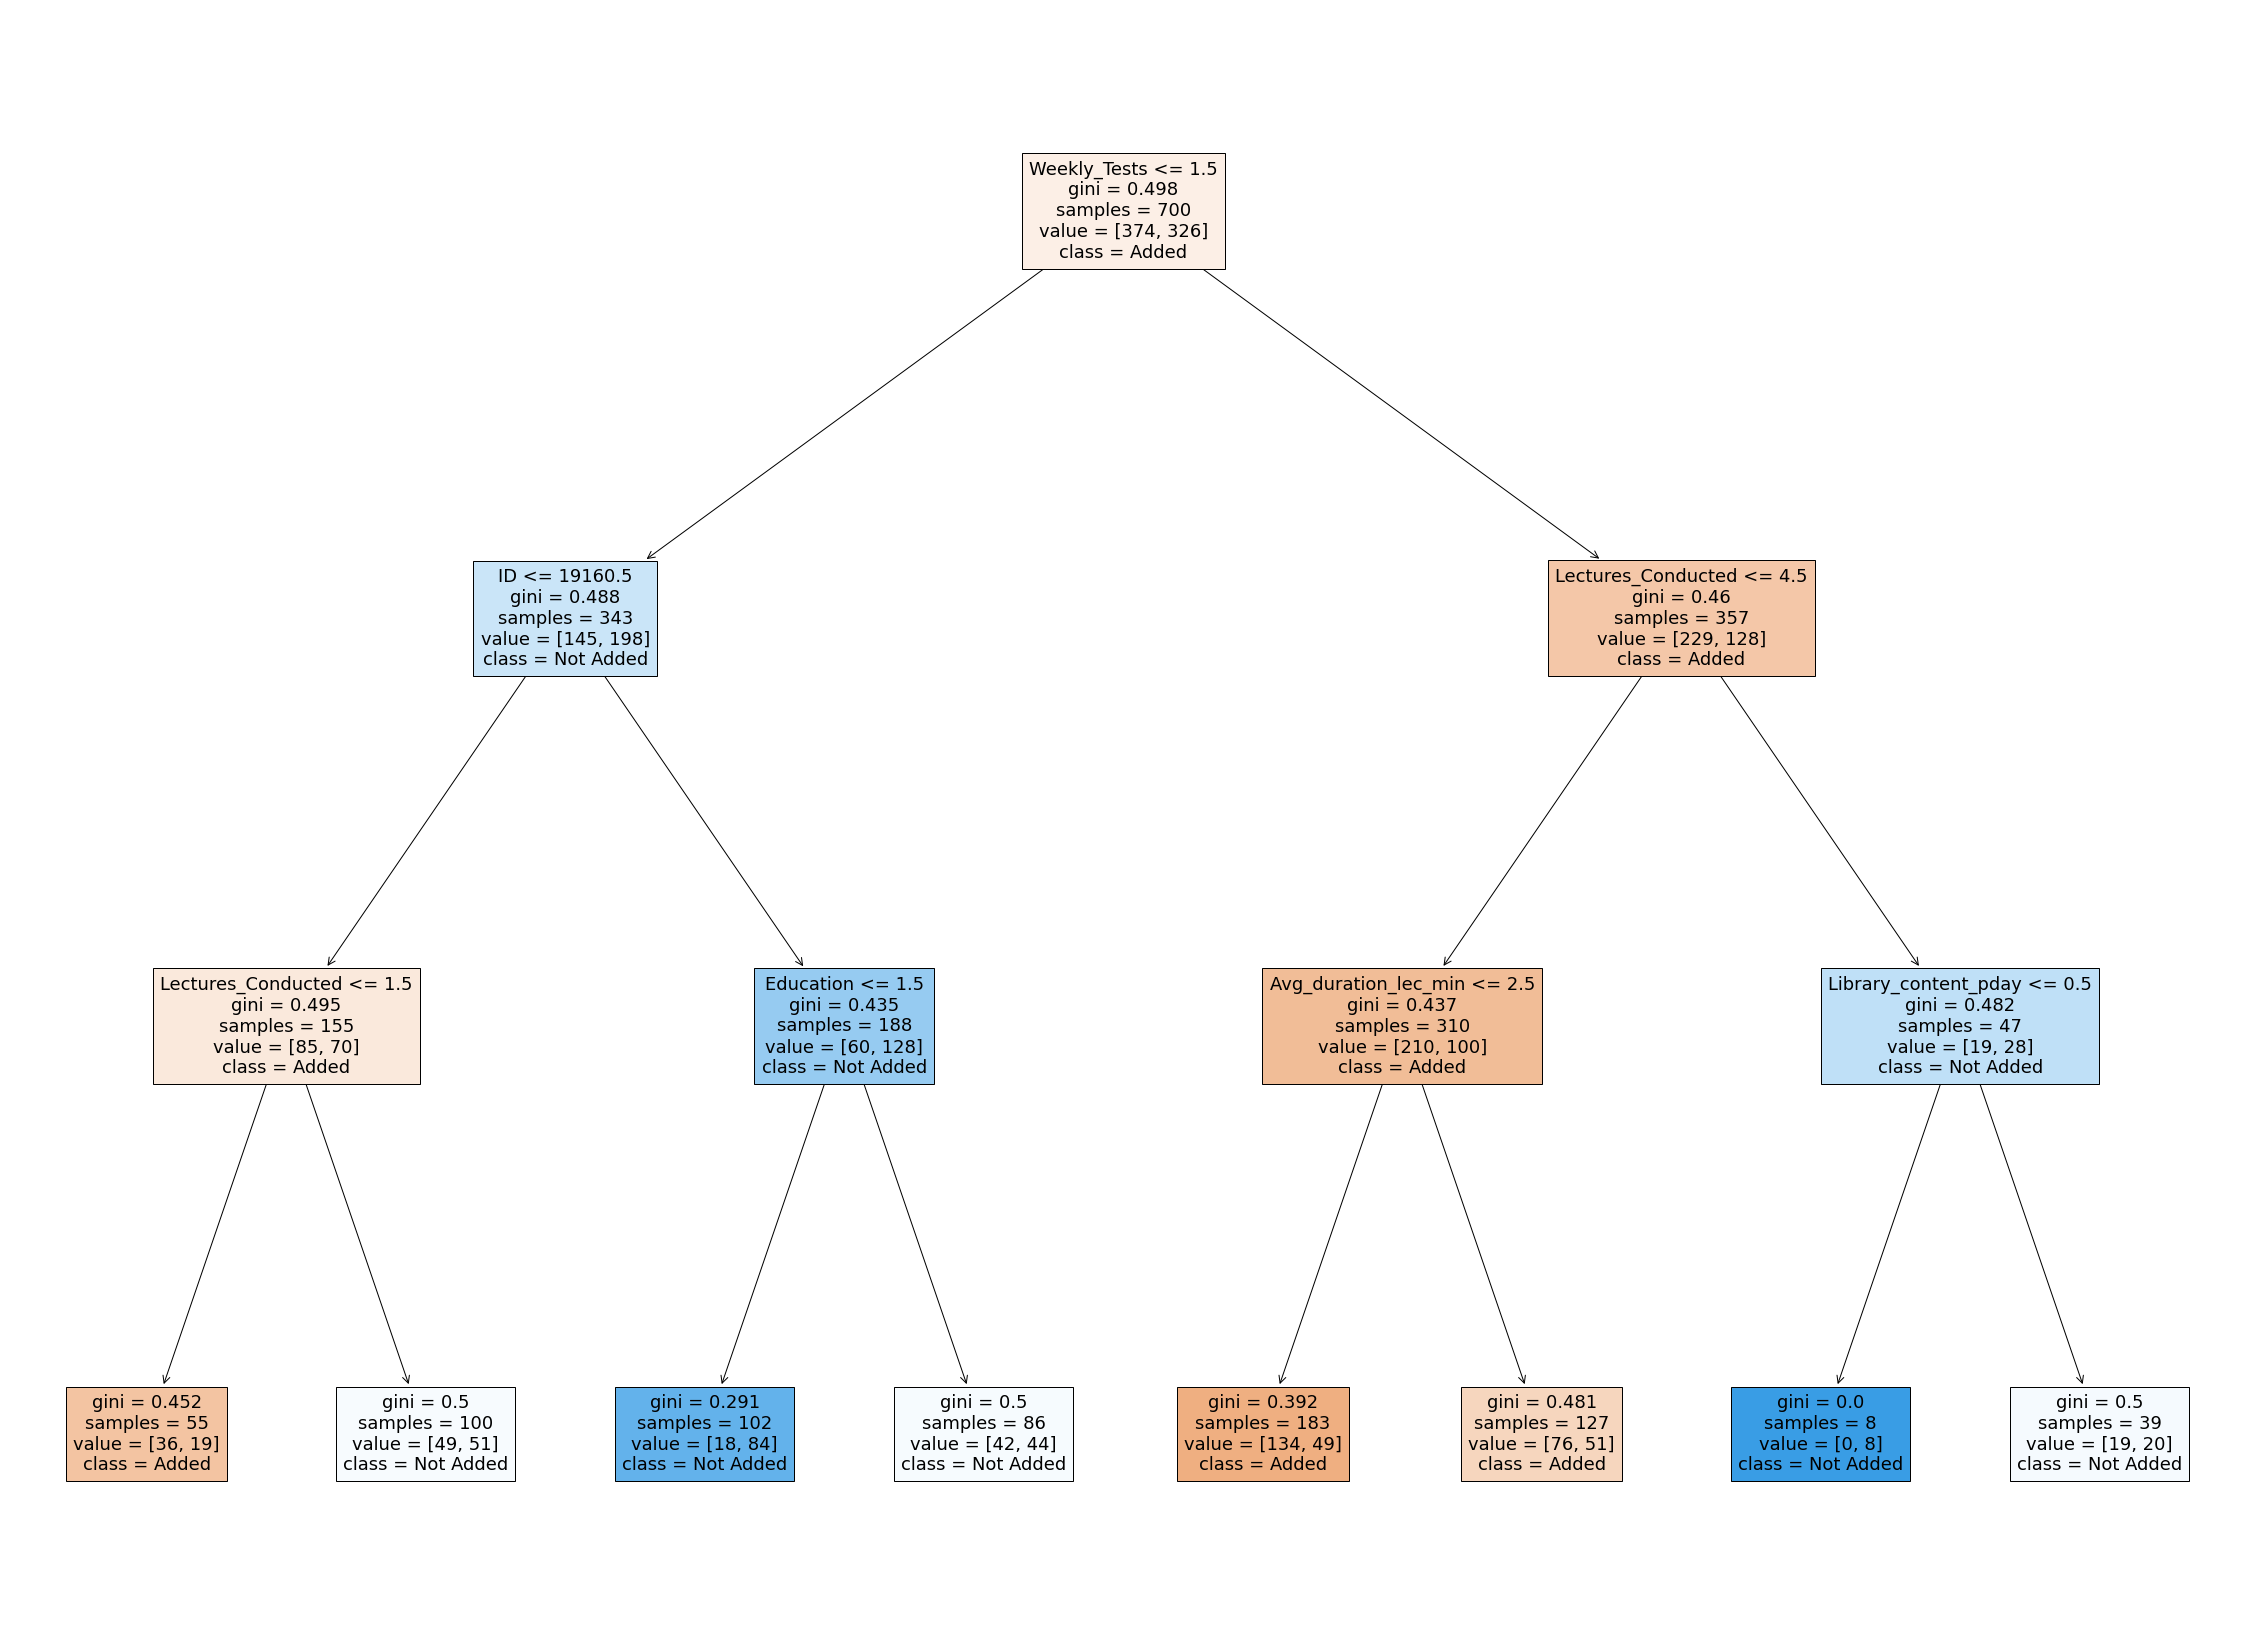

In [268]:
from sklearn import tree

fn=['ID','Gender', 'Lectures_Conducted', 'Library_content_pday', 'Education',
       'Subjects', 'Assignments_Daily', 'Weekly_Tests', 'School_Groups', 'Avg_duration_lec_min']
cn=['Added', 'Not Added']

fig = plt.figure(figsize=(40,30))
_ = tree.plot_tree(model, feature_names = fn, 
               class_names=cn, filled=True)

### Improving Accuracy using Grid Search¶
 

In [269]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(criterion="gini", max_depth=3)
grid_values = {'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 
               'max_depth':[4,5,6,7,8,9,10], 'min_samples_split': [2,3,4]}
grid_model_acc = GridSearchCV(model, param_grid = grid_values)
grid_model_acc.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4]})

In [270]:
y_pred_acc = grid_model_acc.predict(X_test)

print('Accuracy score: {0:0.4f}'. format(accuracy_score(y_test,y_pred_acc)))

cm = confusion_matrix(y_test,y_pred_acc)
print(cm)

Accuracy score: 0.5967
[[95 50]
 [71 84]]


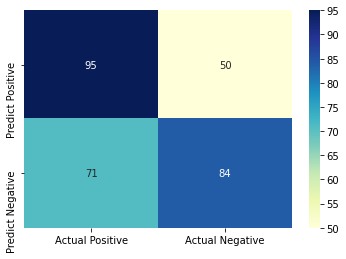

In [271]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [272]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_acc))

              precision    recall  f1-score   support

           0       0.57      0.66      0.61       145
           1       0.63      0.54      0.58       155

    accuracy                           0.60       300
   macro avg       0.60      0.60      0.60       300
weighted avg       0.60      0.60      0.60       300



#### Looks like accuracy paramters didn't improve much. Accuracy, Precision, F1-Score are around 60%. We need to improve accuracy. We will use GridSearchCV to fit best paramters. 




## Random forest  

In [273]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train, y_train) 



RandomForestClassifier()

In [274]:
predict3=model2.predict(X_test)

In [275]:
R_Square = model2.score(X_test, y_test)

In [276]:
print('Model accuracy score: {0:0.4f}'. format(R_Square))

Model accuracy score: 0.6767


In [277]:
importance_df=pd.DataFrame({
    'feature':X_train.columns,
    'importance':model2.feature_importances_
}).sort_values('importance', ascending=False)

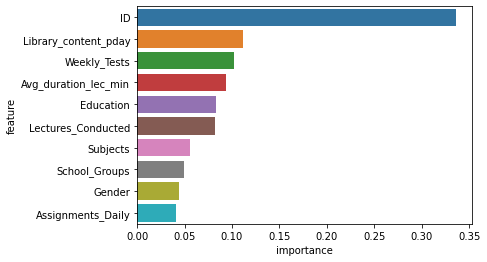

In [278]:
sns.barplot(data=importance_df.head(100), y='feature', x='importance')


### Random Forest with GridSearchCV

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score

rfc = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9, 50, 70, 100], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 15, 20, 35], 
              'min_samples_split': [2, 3, 5, 7],
              'min_samples_leaf': [1,2,3,5,8]
             }
# Passing parameters to select best parameters for better accuracy
grid_obj = GridSearchCV(rfc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the model to the best combination of parameters
rfc = grid_obj.best_estimator_

rfc.fit(X_train, y_train)

In [280]:
Predict2 = rfc.predict(X_test)

# Predict2 = grid_clf_acc.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, Predict2)))

Model accuracy score: 0.6900


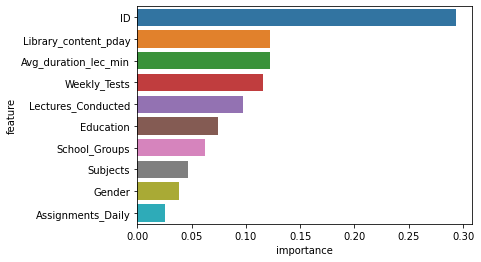

In [281]:
importance_df=pd.DataFrame({
    'feature':X_train.columns,
    'importance':rfc.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(data=importance_df.head(100), y='feature', x='importance')


In [284]:
Predict2 = rfc.predict(X_test)

print('Accuracy score: {0:0.4f}'. format(accuracy_score(y_test,Predict2)))

cm = confusion_matrix(y_test,Predict2)
print(cm)

Accuracy score: 0.6900
[[ 98  47]
 [ 46 109]]


In [283]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Predict2))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       145
           1       0.70      0.70      0.70       155

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300



### Accuracy, Precision, F1-Score are around 70%. Random forest improved accuracy from 60 to 70%. 
### Teachers adding classwork and not adding is 50 - 50.  

##### Conclusion -  we will have to improvise on the Classwork campaign. 


In [286]:
pd.value_counts(y_test)      

1    155
0    145
Name: CW_added, dtype: int64

In [287]:
pd.value_counts(y_train)      

0    374
1    326
Name: CW_added, dtype: int64

## Checking the predicted values

Decision Tree

In [288]:
pd.value_counts(Predict)      

1    165
0    135
dtype: int64

Decision Tree with GridSearchCV paramters

In [289]:
pd.value_counts(y_pred_acc)      

0    166
1    134
dtype: int64

Random forest  with GridSearchCV

In [290]:
pd.value_counts(Predict2)      

1    156
0    144
dtype: int64

Random forest  

In [291]:
pd.value_counts(predict3)      

1    154
0    146
dtype: int64

### Teachers adding classwork and not adding is 50 - 50.  


## KNN Neighbors


In [292]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

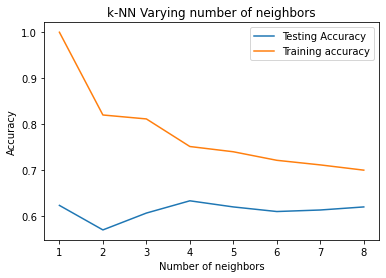

In [293]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We get maximum Accuracy when K=5

In [294]:
knn = KNeighborsClassifier(n_neighbors=5)


In [295]:
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [296]:
knn.score(X_train,y_train)


0.74

In [297]:
knn.score(X_test,y_test)


0.62

In [298]:
knn_pred = knn.predict(X_test)


In [299]:
confusion_matrix(y_test,knn_pred)


array([[93, 52],
       [62, 93]], dtype=int64)

In [300]:
pd.value_counts(knn_pred)      

0    155
1    145
dtype: int64

## Accuracy is Highest in Random Forest Classifier, 70%. 





# Conclusion 
### No noticable effect of campaign on classwork. 
### Teachers adding library content on the OS Platform is the most important feature related to teachers pre-planning lecture. 